# Falling Ball Viscometer
## Example E3 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

Project files saved from the GUI can be loaded into suncal using the `Project...` classes. This example demonstrates loading an uncertainty model configuration from a file using the `ProjectUncert` class and generating some reports.

In [1]:
import suncal

In [2]:
u = suncal.project.ProjectUncert.from_configfile('../Examples/ex_viscometer.yaml').model
result = u.calculate()
result.report.summary(n=3)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$\mu_{m}$   | GUM          | 5.69 mPa·s  | 1.03 mPa·s           | ± 2.01 mPa·s     | 1.960     | inf           |
|$\mu_{m}$   | Monte Carlo  | 5.82 mPa·s  | 1.12 mPa·s           | (4.05 mPa·s, 8.40 mPa·s) | 1.948     | -             |

In [3]:
result.report.variables.summary()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                              |
|----------|---------|------------------|--------------|-----------------------------------------|
|$\mu_{c}$   | 4.630 mPa·s  | 0.046 mPa·s           | inf       | Viscosity of calibration liquid          |
|$\rho_{b}$   | 2217.00 kg/m³  | 0.50 kg/m³           | inf       | Density of ball                          |
|$\rho_{c}$   | 810.00 kg/m³  | 0.50 kg/m³           | inf       | Density of calibration liquid            |
|$\rho_{m}$   | 1180.00 kg/m³  | 0.50 kg/m³          | inf      | Density of sodium hydroxide solution     |
|$t_{c}$   | 36.6 s | 5.5 s          | inf      | Travel time in calibration liquid        |
|$t_{m}$   | 61.0 s | 6.1 s          | inf      | Travel time in sodium hydroxide solution |

In [4]:
result.report.expanded()

### GUM Approximation


|Function   | Level of Confidence   | Minimum   | Maximum   | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|---------------------|---------|---------|---------|--------------|----------------------|
|$\mu_{m}$   | 95.00%                | 3.7 mPa·s  | 7.7 mPa·s  | 1.960     | inf            | 2.0 mPa·s              |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Level of Confidence   | Minimum   | Maximum   | Coverage Factor  |
|----------|---------------------|---------|---------|-----------------|
|$\mu_{m}$   | 95.00%                | 4.1 mPa·s  | 8.4 mPa·s  | 1.948            |

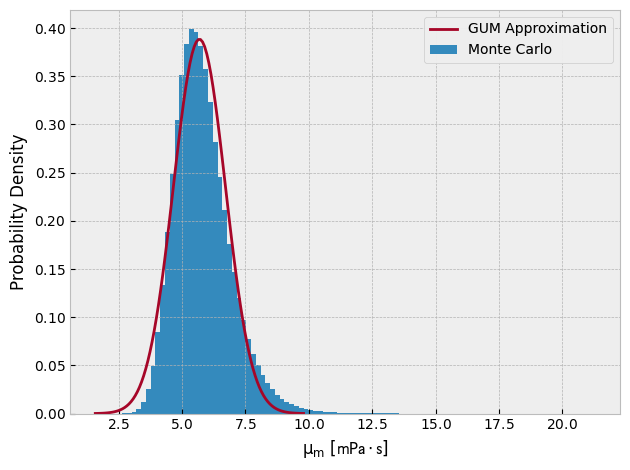

In [5]:
# Compare to NIST1900 Exhibit 3.
result.report.plot.pdf();

In [6]:
# What did the GUM calculation actually do?
result.report.gum.derivation(solve=True)

### Measurement Model:

$\mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$\mu_{c} = 4.6\,\mathrm{mPa} \cdot \mathrm{s}$   | $u_{\mu c} = 0.046\,\mathrm{mPa} \cdot \mathrm{s}$           | $\nu_{\mu c} = \infty$      |
|$\rho_{b} = 2.2 \cdot 10^{3}\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$   | $u_{\rho b} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$           | $\nu_{\rho b} = \infty$      |
|$\rho_{c} = 8.1 \cdot 10^{2}\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$   | $u_{\rho c} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$           | $\nu_{\rho c} = \infty$      |
|$\rho_{m} = 1.2 \cdot 10^{3}\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$   | $u_{\rho m} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$          | $\nu_{\rho m} = \infty$     |
|$t_{c} = 37.0\,\mathrm{s}$  | $u_{t c} = 5.5\,\mathrm{s}$          | $\nu_{t c} = \infty$     |
|$t_{m} = 61.0\,\mathrm{s}$  | $u_{t m} = 6.1\,\mathrm{s}$          | $\nu_{t m} = \infty$     |


### Sensitivity Coefficients

$\frac{d}{d \mu_{c}} \mu_{m} = \frac{t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = 1.2 $

$\frac{d}{d \rho_{b}} \mu_{m} = \frac{\mu_{c} t_{m} \left(- \rho_{c} + \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}} = 0.0014 \frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

$\frac{d}{d \rho_{c}} \mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}} = 0.0040 \frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

$\frac{d}{d \rho_{m}} \mu_{m} = - \frac{\mu_{c} t_{m}}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = -0.0055 \frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

$\frac{d}{d t_{c}} \mu_{m} = \frac{\mu_{c} t_{m} \left(- \rho_{b} + \rho_{m}\right)}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)} = -0.16 \mathrm{mPa}$

$\frac{d}{d t_{m}} \mu_{m} = \frac{\mu_{c} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = 0.093 \mathrm{mPa}$

### Combined Uncertainty:

$u_{\mu m} = \sqrt{\frac{\mu_{c}^{2} t_{m}^{2} u_{\rho b}^{2} \left(- \rho_{c} + \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{2} t_{m}^{2} u_{\rho c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{2} t_{m}^{2} u_{\rho m}^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}} + \frac{\mu_{c}^{2} u_{t m}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}} + \frac{\mu_{c}^{2} t_{m}^{2} u_{t c}^{2} \left(- \rho_{b} + \rho_{m}\right)^{2}}{t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{2}} + \frac{t_{m}^{2} u_{\mu c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}}} = 1.0 \mathrm{mPa} \cdot \mathrm{s}$

### Effective degrees of freedom:

$\nu_{\mu m} = \frac{u_{\mu m}^{4}}{\frac{\mu_{c}^{4} u_{t m}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{t m} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{t c}^{4} \left(- \rho_{b} + \rho_{m}\right)^{4}}{\nu_{t c} t_{c}^{8} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho m}^{4}}{\nu_{\rho m} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho c}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{\rho c} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{8}} + \frac{\mu_{c}^{4} t_{m}^{4} u_{\rho b}^{4} \left(- \rho_{c} + \rho_{m}\right)^{4}}{\nu_{\rho b} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{8}} + \frac{t_{m}^{4} u_{\mu c}^{4} \left(\rho_{b} - \rho_{m}\right)^{4}}{\nu_{\mu c} t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{4}}} = inf$